# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

# Exporting Dataset (CIFAR 100) and Initialising Test and Train Data

In [ ]:

cifar100= tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test)= cifar100.load_data()


169017344/169001437 [==============================] - 4s 0us/step


# Checking Shape of Train And Test Datasets

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


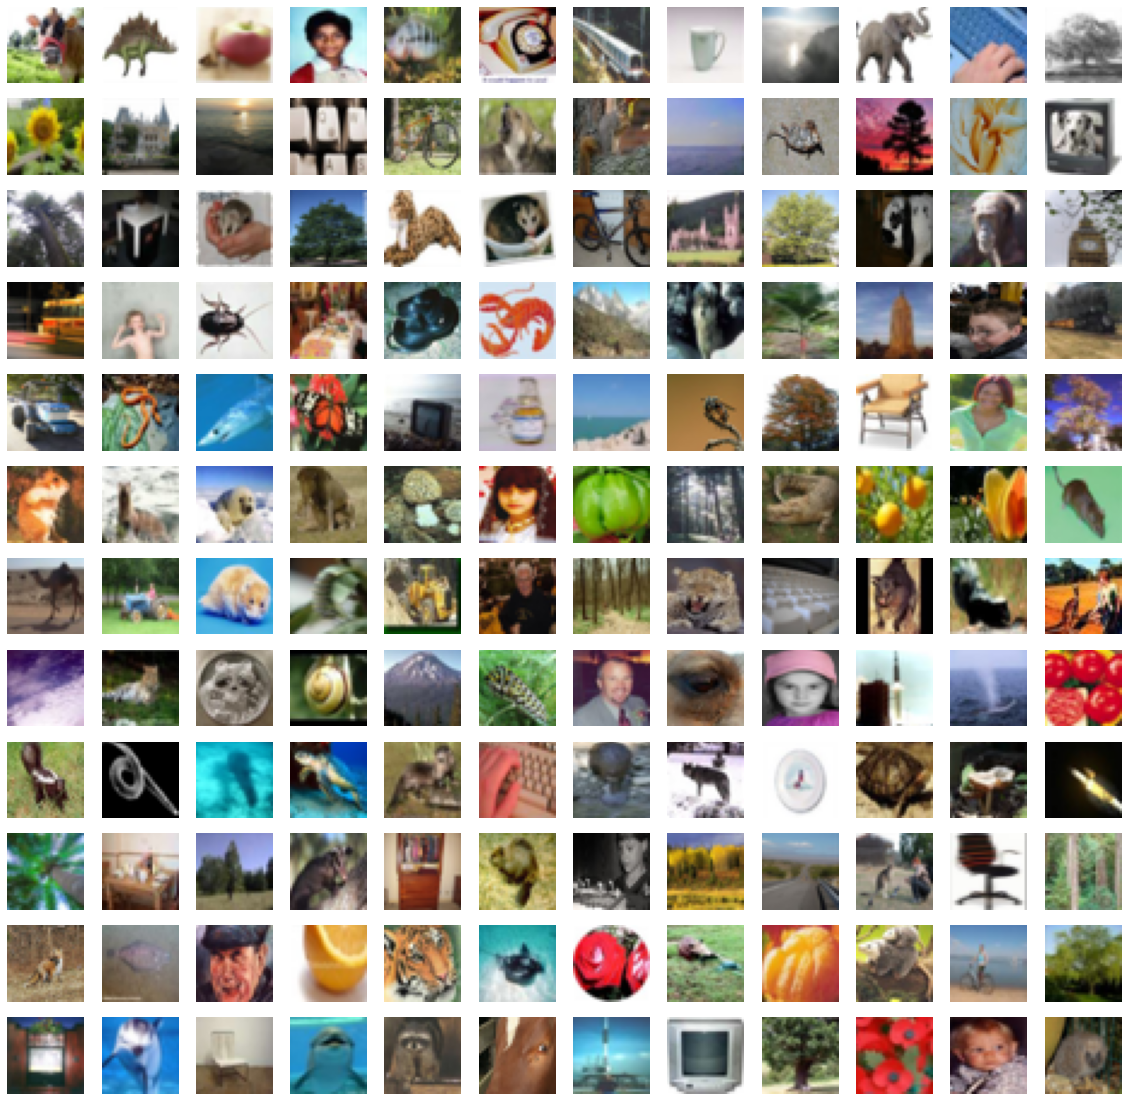

In [ ]:

plt.figure(figsize= (20,20))
for i in range(144):
  plt.subplot(12,12,i+1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap= 'gray')

# Setting Model Configuration

In [ ]:
batch_size= 50
img_width, img_height, img_num_channels= 32, 32, 3
loss_function= tf.keras.losses.sparse_categorical_crossentropy
no_classes= 100
no_epochs= 15
optimizer= tf.keras.optimizers.Adam()
validation_split= 0.2
verbosity= 1



# Input Shape Determination

In [ ]:
input_shape = (img_width, img_height, img_num_channels)

# Parsing Train Set as Floats

In [ ]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

# Data Normalization

In [ ]:
X_train= X_train/ 255
X_test= X_test/ 255

# Model Creation

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Model Compilation

In [ ]:
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fitting Data

In [ ]:
history = model.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/15
800/800 [==============================] - 34s 4ms/step - loss: 4.1237 - accuracy: 0.0606 - val_loss: 3.7241 - val_accuracy: 0.1197
Epoch 2/15
800/800 [==============================] - 3s 4ms/step - loss: 3.4676 - accuracy: 0.1655 - val_loss: 3.2809 - val_accuracy: 0.1973
Epoch 3/15
800/800 [==============================] - 3s 4ms/step - loss: 3.1195 - accuracy: 0.2279 - val_loss: 3.0402 - val_accuracy: 0.2584
Epoch 4/15
800/800 [==============================] - 3s 4ms/step - loss: 2.8797 - accuracy: 0.2758 - val_loss: 2.9331 - val_accuracy: 0.2760
Epoch 5/15
800/800 [==============================] - 3s 4ms/step - loss: 2.6855 - accuracy: 0.3151 - val_loss: 2.7664 - val_accuracy: 0.3072
Epoch 6/15
800/800 [==============================] - 3s 4ms/step - loss: 2.5281 - accuracy: 0.3463 - val_loss: 2.7261 - val_accuracy: 0.3231
Epoch 7/15
800/800 [==============================] - 3s 4ms/step - loss: 2.3880 - accuracy: 0.3747 - val_loss: 2.6156 - val_accuracy: 0.3366
Epoch

# Generating Generalization Metrics

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.7236950397491455 / Test accuracy: 0.36959999799728394


# Visualization of History

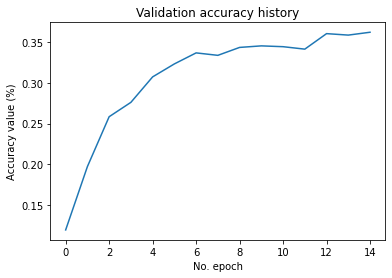

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

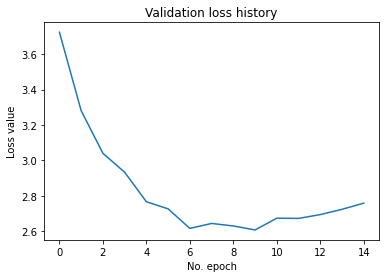

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# It gives a model overfit!!